In [40]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Question 1**

In [41]:
!pip install tabulate

In [43]:
import os
import re
import pandas as pd
from tabulate import tabulate

# Define the directory containing the 400 emails
email_directory = '/content/drive/MyDrive/400_emails'

# Initialize a dictionary to count mentions of "Jimmy Fraud"
mention_count_dict = {}

# Iterate over each file in the email directory
for email_filename in os.listdir(email_directory):
    if email_filename.endswith('.txt'):
        # Extract the individual ID from the filename
        individual_id = int(re.search(r'\d+', email_filename).group())

        # Open and read the email content
        with open(os.path.join(email_directory, email_filename), 'r') as email_file:
            email_content = email_file.read()

        # Count the mentions of "Jimmy Fraud" in the email content
        mention_count = email_content.lower().count('jimmy fraud')

        # Store the count in the dictionary using the individual ID as the key
        mention_count_dict[individual_id] = mention_count

# Convert the dictionary to a DataFrame
mention_count_df = pd.DataFrame(list(mention_count_dict.items()), columns=['Individual_ID', 'Mention_Count'])

# Filter and sort the DataFrame for individuals with more than 15 mentions
filtered_mention_count_df = mention_count_df[mention_count_df['Mention_Count'] > 15].sort_values(by='Mention_Count', ascending=False)

# Rename columns to match the desired format
filtered_mention_count_df.columns = ['Person', 'Jimmy Fraud Mentions']

# Format the 'Individual' column
filtered_mention_count_df['Person'] = filtered_mention_count_df['Person'].apply(lambda x: f'Individual ({x})')

# Use tabulate to print the DataFrame in a formatted table
print(tabulate(filtered_mention_count_df.head(15), headers='keys', tablefmt='grid', showindex=False))


+------------------+------------------------+
| Person           |   Jimmy Fraud Mentions |
+==================+========================+
| Individual (353) |                     25 |
+------------------+------------------------+
| Individual (291) |                     24 |
+------------------+------------------------+
| Individual (4)   |                     23 |
+------------------+------------------------+
| Individual (123) |                     22 |
+------------------+------------------------+
| Individual (67)  |                     21 |
+------------------+------------------------+
| Individual (298) |                     19 |
+------------------+------------------------+
| Individual (188) |                     19 |
+------------------+------------------------+
| Individual (248) |                     19 |
+------------------+------------------------+
| Individual (376) |                     18 |
+------------------+------------------------+
| Individual (143) |              

**Question 2 Statistics**

In [14]:
# Calculate statistics for all mentions
total_mentions = mention_count_df['Mention_Count'].sum()
mean_mentions = mention_count_df['Mention_Count'].mean()
std_dev_mentions = mention_count_df['Mention_Count'].std()
min_mentions = mention_count_df['Mention_Count'].min()
max_mentions = mention_count_df['Mention_Count'].max()

# Display the statistics
print("\nStatistics of 'Jimmy Fraud' Mentions")
print("-----------------------------------")
print(f"Total number of mentions: {total_mentions}")
print(f"Mean mentions per person: {mean_mentions:.2f}")
print(f"Standard deviation of mentions: {std_dev_mentions:.2f}")
print(f"Minimum mentions: {min_mentions}")
print(f"Maximum mentions: {max_mentions}")


Statistics of 'Jimmy Fraud' Mentions
-----------------------------------
Total number of mentions: 1993
Mean mentions per person: 4.98
Standard deviation of mentions: 4.35
Minimum mentions: 1
Maximum mentions: 25


**Question 3 Histogram**

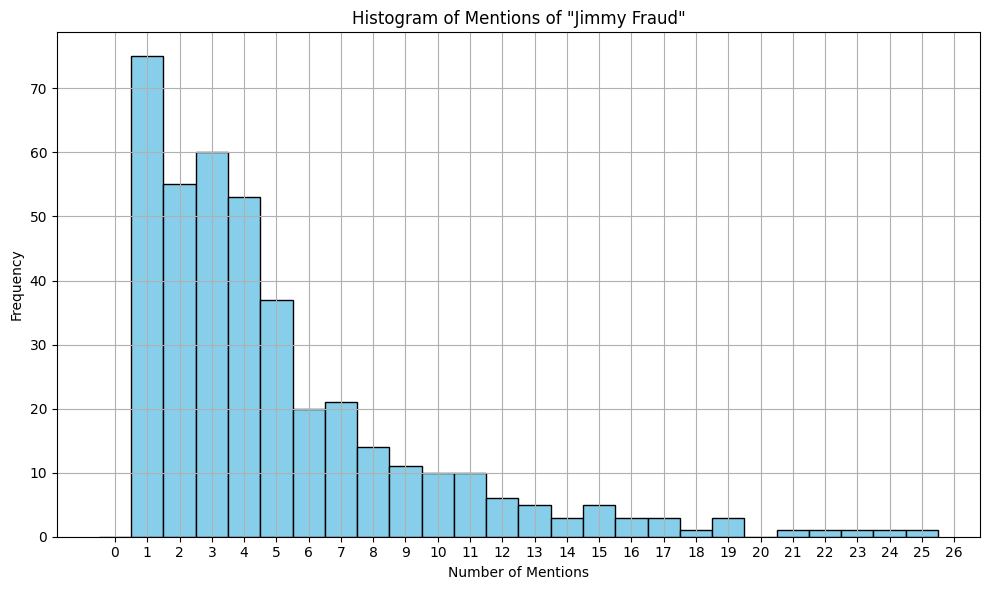

In [15]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing the emails
email_folder = '/content/drive/MyDrive/400_emails'

# Initialize a dictionary to store the counts
mentions = {}

# Iterate through each file in the folder
for filename in os.listdir(email_folder):
    if filename.endswith('.txt'):
        # Extract the individual number from the filename
        individual_number = int(re.search(r'\d+', filename).group())

        # Open and read the email content
        with open(os.path.join(email_folder, filename), 'r') as file:
            content = file.read()

        # Count the mentions of "Jimmy Fraud"
        count = content.lower().count('jimmy fraud')

        # Store the count in the dictionary
        mentions[individual_number] = count

# Convert the dictionary to a DataFrame
mentions_df = pd.DataFrame(list(mentions.items()), columns=['Individual', 'Mentions'])

# Plot histogram with smaller bins
plt.figure(figsize=(10, 6))
bins = range(0, max(mentions_df['Mentions']) + 2)  # Bins for each count from 0 to max mentions
plt.hist(mentions_df['Mentions'], bins=bins, color='skyblue', edgecolor='black', align='left')

# Adding labels and title
plt.title('Histogram of Mentions of "Jimmy Fraud"')
plt.xlabel('Number of Mentions')
plt.ylabel('Frequency')
plt.xticks(bins)  # Set x-ticks to match the bin intervals

plt.grid(True)
plt.tight_layout()
plt.show()


**Question 4**

**Displaying Rows and Columns of the Dataset**

In [32]:
import pandas as pd

# Load the data
csv_file_path = '/content/drive/MyDrive/Jimmy_fraud(2).csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file_path)

# Display the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display the first few rows of the dataframe
#in this case it will display first 5 rows
print(df.head())


Number of rows: 284807
Number of columns: 22
  Defrauded       AB1       AB2       AB3       AB4       AB5       AB6  \
0        No -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        No  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        No -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        No -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        No -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

        AB7       AB8       AB9  ...      AB12      AB13      AB14      AB15  \
0  0.239599  0.098698  0.363787  ... -0.617801 -0.991390 -0.311169  1.468177   
1 -0.078803  0.085102 -0.255425  ...  1.065235  0.489095 -0.143772  0.635558   
2  0.791461  0.247676 -1.514654  ...  0.066084  0.717293 -0.165946  2.345865   
3  0.237609  0.377436 -1.387024  ...  0.178228  0.507757 -0.287924 -0.631418   
4  0.592941 -0.270533  0.817739  ...  0.538196  1.345852 -1.119670  0.175121   

       AB16      AB17  

**Preprocessing the Data**

In [33]:
# Encode 'Defrauded' column to numerical values: 1 for 'YES' and 0 for 'NO'
df['Defrauded'] = df['Defrauded'].apply(lambda x: 1 if x == 'YES' else 0)

# Separate features and target variable
X = df.drop(columns=['Defrauded'])
y = df['Defrauded']


**Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


**Training and Evaluating Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=30)
rf_classifier.fit(X_train, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


**Training and Evaluating Decision Tree Classifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=30)
dt_classifier.fit(X_train, y_train)

# Predict on the test set using Decision Tree
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


**Confusion Matrices and Accuracy Scores**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True)
    plt.title(f'{title} - Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.show()



Random Forest Accuracy: 1.00


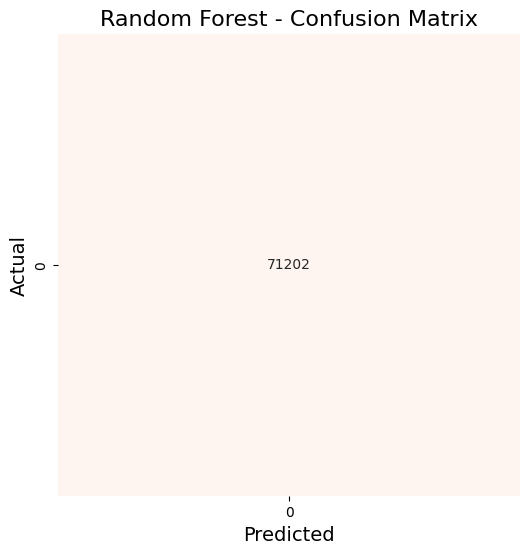

In [37]:
# Print accuracy scores
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
# Plot confusion matrix for Random Forest
plot_confusion_matrix(conf_matrix_rf, 'Random Forest')





Decision Tree Accuracy: 1.00


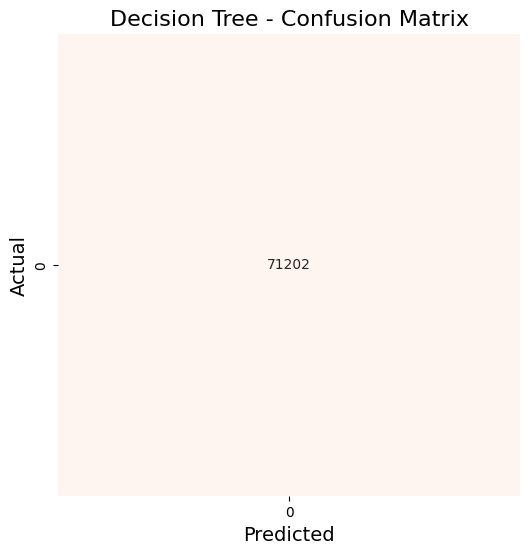

In [39]:
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
# Plot confusion matrix for Decision Tree
plot_confusion_matrix(conf_matrix_dt, 'Decision Tree')